# Análisis Exploratorio de Supermercado Santa Isabel

<img src="https://play-lh.googleusercontent.com/gROtNrj8vGhnMKf0QyPgmMCbQU4R8wFZ329H-aO-M7OLTOzzW2zHM1wEgqdgF7Bo6es" alt="Logo_Santa_Isabel" width="200"/>

## Resumen del proyecto
En este proyecto, investigo el dataset de productos del supermecado [santaisabel.cl](https://www.santaisabel.cl/). Con el uso de las bibliotecas Python Scipy, NumPy, Pandas, Matplotlib y Seaborn.

### Información del conjunto de datos

**Datos de santaisabel** : Contiene datos de nombre, precios, marcas y categoría ofrecidos en su pagina web de 4470 productos

| Variable     	| Definición                                           	| Ejemplo                                                            	|   	|   	|
|--------------	|------------------------------------------------------	|--------------------------------------------------------------------	|---	|---	|
| title        	| Es el titulo del producto                            	| Pasta dental triple 3 un. 90 g                                     	|   	|   	|
| brand        	| Es la marca del producto                             	| Pepsodent                                                          	|   	|   	|
| normal_price 	| Es el precio normal                                  	| 2.790                                                              	|   	|   	|
| low_price    	| Es el precio con oferta                              	| 2.590                                                              	|   	|   	|
| high_price   	| Es el precio antes de la oferta                      	| 3.190                                                              	|   	|   	|
| oferta       	| Si el producto tiene una oferta                      	| 1                                                                  	|   	|   	|
| categoria1   	| Categoría de los productos                            	| supermercados                                                      	|   	|   	|
| categoria2   	| Subcategoria de los productos                        	| belleza-y-cuidado-personal                                         	|   	|   	|
| datetime     	| Fecha en que se recoletaron los datos                	|                                                         2022-07-16 	|   	|   	|
| Atributos    	| Es el peso del producto                              	| 500 g                                                              	|   	|   	|
| link         	| Enlace hacia el producto                             	| https://www.santaisabel.cl/queso-mantecoso-granulado-c-y-co-250g/p 	|   	|   	|
| sin_stock    	| Si el producto esta disponible                       	| o                                                                  	|   	|   	|
| page         	| Paginas donde se encuentra el producto en la website 	| 3                                                                  	|   	|   	|

## Preguntas iniciales e investigación de datos
-  ¿ cuál es la distribución de precios de todos los productos ?
-  ¿ cuál es la cantidad de productos con ofertas con respecto a los que no lo tienen ?
-  ¿ cuál es el producto más caro ?
-  ¿ cuál es la distribución del precio de los productos con respecto a su categoría y su sub categoría?
-  ¿ cuál es la marca mas frecuente en santaisabel. Que posee mayor cantidad de productos ?
-  ¿ cuales son los productos que tienen un mayor descuento y cuales son sus porcentaje ?
-  ¿ cuales son las palabras más frecuentes de los productos ?
    
Cargaremos las bibliotecas de Python necesarias para nuestro análisis y leeremos nuestro dataset:

In [5]:
#pip install plotly

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#concateno varios dataset en un solo dataset
result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CD BASIC/result.csv')
result.head()

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,sin_stock,page
0,Pasta dental Ultra Blanco 3 un. 90 g c/u,Colgate,0.0,2590.0,3249.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
1,Pasta dental triple 3 un. 90 g,Pepsodent,0.0,2790.0,2979.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
2,Jabón líquido Dermo Care avena doypack 750 ml,Simond'S,1549.0,0.0,0.0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
3,Jabón líquido original 700 ml,Dove,0.0,2659.0,3549.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
4,Pasta dental Xtra Whitening 3 un. 90 g,Pepsodent,0.0,2135.0,2979.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4468 non-null   object 
 1   brand         4468 non-null   object 
 2   normal_price  4468 non-null   float64
 3   low_price     4468 non-null   float64
 4   high_price    4468 non-null   float64
 5   oferta        4468 non-null   int64  
 6   categoria1    4468 non-null   object 
 7   categoria2    4468 non-null   object 
 8   datetime      4468 non-null   object 
 9   Atributos     4468 non-null   object 
 10  sin_stock     4468 non-null   int64  
 11  page          4468 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 419.0+ KB


## Limpieza de datos
No usaremos la columna 'link' para esta investigación inicial.

In [10]:
#result.drop('link',axis=1,inplace=True)

Revisamos si hay valores nulos

In [11]:
result.isnull().sum()

,0
title,0
brand,0
normal_price,0
low_price,0
high_price,0
oferta,0
categoria1,0
categoria2,0
datetime,0
Atributos,0


In [12]:
result.empty

False

In [13]:
# Check if all values are zero in column 'Budget'
for column in list(result):
    if (result[column] == 0).any():
        print(f"All values in the column '{column}' are Zero")
    else:
        print(f"All values in the column '{column}' are not Zero")


All values in the column 'title' are not Zero
All values in the column 'brand' are not Zero
All values in the column 'normal_price' are Zero
All values in the column 'low_price' are Zero
All values in the column 'high_price' are Zero
All values in the column 'oferta' are Zero
All values in the column 'categoria1' are not Zero
All values in the column 'categoria2' are not Zero
All values in the column 'datetime' are not Zero
All values in the column 'Atributos' are not Zero
All values in the column 'sin_stock' are Zero
All values in the column 'page' are not Zero


In [14]:
zero_price = result.loc[result["normal_price"]==0, "normal_price"].value_counts().sort_index()
zero_price

,count
normal_price,
0.0,1064


In [15]:
f'price with zero values {round((zero_price/len(result) )* 100,2)} %'

'price with zero values normal_price\n0.0    23.81\nName: count, dtype: float64 %'

In [16]:
# cambiamos el tipo de columna de fecha de un object a un timetime para poder trabajar con fechas
result['datetime'] = pd.to_datetime(result['datetime'])

creación de una función para limpiar los signos de las monedas y obtener solo el valor sin comas y le cambiamos su tipo a flotante

In [17]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace('.', '').replace('Normal:','').replace(',',''))
    return(x)

result['low_price'] = result['low_price'].apply(clean_currency).astype('float')
result['high_price'] = result['high_price'].apply(clean_currency).astype('float')
result['normal_price'] = result['normal_price'].apply(clean_currency).astype('float')
#df['low_price'] = df['low_price'].str.replace(',', '').str.replace('$', '')
#df['low_price'].astype(np.float64)
#df['low_price'] = pd.to_numeric(df['low_price'],errors = 'coerce')
#df['low_price'].astype('float')
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         4468 non-null   object        
 1   brand         4468 non-null   object        
 2   normal_price  4468 non-null   float64       
 3   low_price     4468 non-null   float64       
 4   high_price    4468 non-null   float64       
 5   oferta        4468 non-null   int64         
 6   categoria1    4468 non-null   object        
 7   categoria2    4468 non-null   object        
 8   datetime      4468 non-null   datetime64[ns]
 9   Atributos     4468 non-null   object        
 10  sin_stock     4468 non-null   int64         
 11  page          4468 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 419.0+ KB


cambiamos el valor 'Producto sin stock' a 0 y si hay stock a 1
para oferta se hace igual cuando hay oferta se cambia a 1 y cuando no se cambia a cero

In [18]:
result['sin_stock'] = result['sin_stock'].apply(lambda x:0 if x=='Producto sin stock' else 1)
result['oferta'] = result['oferta'].apply(lambda x:1 if x=='Oferta' else 0)

### valores duplicados
Revisamos si hay valores duplicados en caso de conseguirlos se eliminan

In [19]:
result.duplicated().sum()

0

In [20]:
result[result.duplicated()==True]

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,sin_stock,page


In [21]:
result.drop_duplicates(keep=False,inplace=True)

## Ingeniería de Características

Preparar datos de entrada relevantes que sean compatibles con los requisitos del algoritmo

In [22]:
#obtener la diferencia del precio mas alto con respecto al descuento y cuardalo en la variable ahorro
result['ahorro'] = result['high_price'] - result['low_price']

In [23]:
#obtener el ahorro en porcentajes
result['ahorro_percent'] = (result['ahorro'] /
                      result['ahorro'].sum()) * 100

#que solo muestre los primeros 3 decimales
result['ahorro_percent'] = round(result['ahorro_percent'],3)
result.head(3)


,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,sin_stock,page,ahorro,ahorro_percent
0,Pasta dental Ultra Blanco 3 un. 90 g c/u,Colgate,0.0,2590.0,3249.0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1,659.0,1.005
1,Pasta dental triple 3 un. 90 g,Pepsodent,0.0,2790.0,2979.0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1,189.0,0.288
2,Jabón líquido Dermo Care avena doypack 750 ml,Simond'S,1549.0,0.0,0.0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1,0.0,0.000


convertir todas las unidades a kilogramos  

In [24]:

result['Atributos'].unique()


array(['1 un', '500 g', '100 g', '1.5 kg', '1.7 kg', '1.6 kg', '300 g',
       '1.3 kg', '1 kg', '2 kg', '400 g', '2.2 kg', '1.4 kg', '900 g',
       '2.5 kg', '2.3 kg', '800 g'], dtype=object)

In [25]:
def to_kilos(arg):
    """convierto todas las unidades a kilos"""
    valor =  re.findall(r'-?\d+\.?\d*', arg)
    unidad = re.findall(r'[a-z]+$', arg)
    unidad =  ''.join(unidad)
    valor = ''.join(valor)
    valor = pd.to_numeric(valor)
    if unidad == 'g':
        return valor /1000.0
    else:
        return valor


result['kilo'] = result['Atributos'].apply(to_kilos)
result['kilo']

,kilo
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4463,1.0
4464,1.0
4465,1.0
4466,1.0


## Analisis de Dato

### Obtener los 10 productos que ofrecen mayor descuentos

In [26]:
result[result['ahorro']>0].sort_values(by='ahorro',ascending = False)[['title','low_price','normal_price','high_price','ahorro','ahorro_percent']].head(10)

,title,low_price,normal_price,high_price,ahorro,ahorro_percent
240,Pack 24 un. Cerveza lager 5.2° 330 cc,12490.0,0.0,21990.0,9500.0,14.492
336,Caja 24 un. cerveza lager botella 330 cc c/u,12990.0,0.0,22270.0,9280.0,14.156
244,Pack 18 un. Cerveza Lager 4.6° 330 cc c/u,12990.0,0.0,19750.0,6760.0,10.312
307,Pack 24 un. Cervezas lata 350 cc,10890.0,0.0,16990.0,6100.0,9.305
1771,Lomo Vetado kg,16485.0,0.0,22485.0,6000.0,9.153
274,Pack 18 un. Cerveza Golden 4.8° 354 cc,7950.0,0.0,12950.0,5000.0,7.627
454,Whisky Johnnie Walker Black Label 750 cc,26990.0,0.0,31490.0,4500.0,6.865
1820,Costillar al vacío kg,17227.0,0.0,21597.0,4370.0,6.666
1591,Leche en Polvo Nido Forticrece Sin lactosa 1440g,14550.0,0.0,18899.0,4349.0,6.634
1243,Leche en Polvo Nido Forticrece Sin lactosa 1440g,14550.0,0.0,18899.0,4349.0,6.634


La cerveza son los productos que tiene una mayor variabilidad de precio. Cuando se encuentra en oferta se puede ahorrar 9500 pesos o 14 %
seria interesante como varían las ofertas y precio en el tiempo

In [27]:
# Make a function to get the composition of the variables per number of products
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    link -> https://jkarakas.github.io/Exploratory-Analysis-of-the-Titanic-Dataset/Titanic_Dataset_Exploratory_Analysis._With_Code.html
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)

    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))

    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)

    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

### Análisis de la Categoría.
iniciamos visualizando la cantidad de productos por la categoría a la que pertenece

Total No. of categoria1:4468


<ipython-input-27-0b3ca9379b88>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


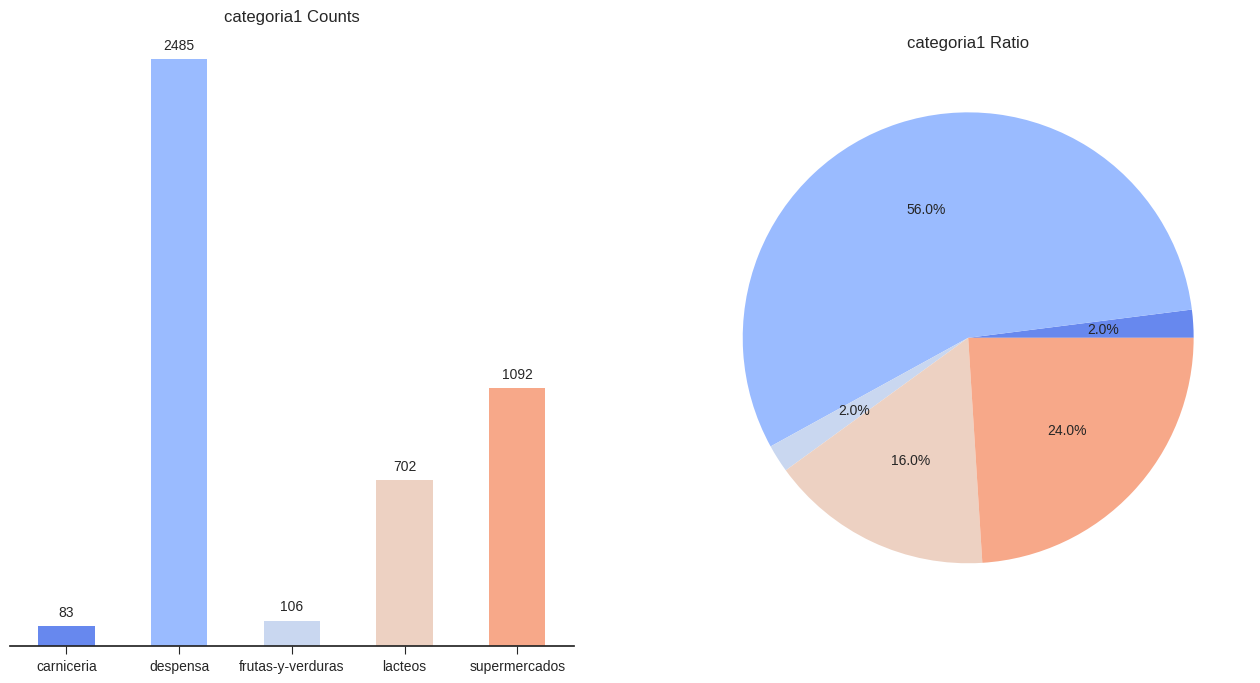

In [28]:
Groupby_OneCol_comp_plot(result, 'categoria1')

Vemos que la mayor cantidad de productos se encuentra en la categoría de despensa (2485 de 4470 - 56%) <br>
seguido de la categoría supermercado con (1092 de 4470 - 24%) <br>
y la categoría con menor productos es carnicería con (83 de 4470 - 20%)


In [29]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):
    grouped = table

    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:
        del grouped['Total']
    except:
        pass

    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally

    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass
    # set custom title
    plt.title(custom_title)

def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):

    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)

    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)

    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)

<ipython-input-29-cabb24c48f4f>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


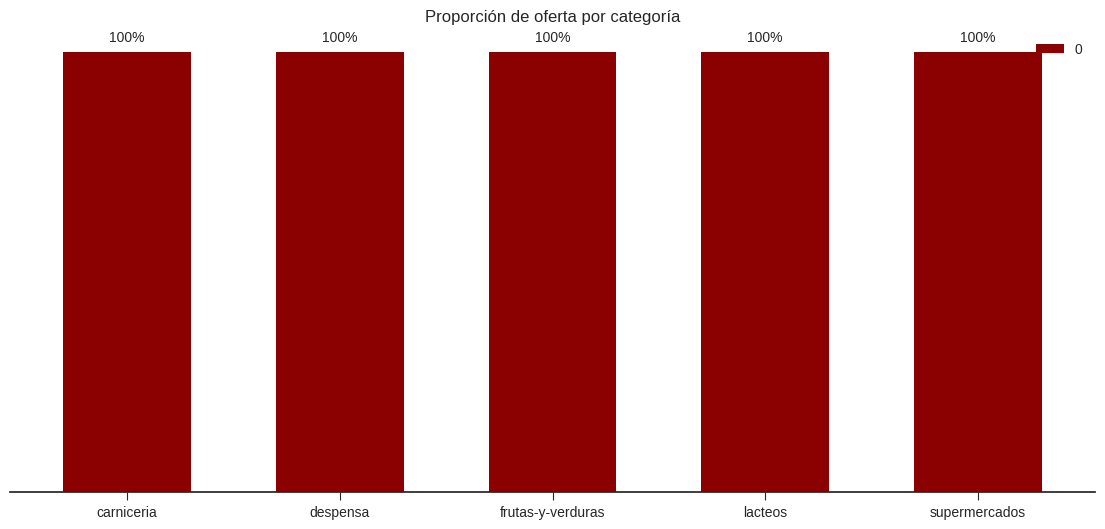

In [30]:
Groupby_TwoCol_Plot(result,'categoria1', 'oferta', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proporción de oferta por categoría')

Santaisabel ofrece descuento en productos de supermercado. luego en productos de carnicería. esto posiblemente se debe a que tienden a dañarse rápidamente

### Distribución de Precios por Categoría

In [31]:
#plt.figure(figsize=(15,8))
#sns.boxplot(data=result,x='categoria1',y='normal_price')
fig = px.box(result, x="categoria1", y="normal_price",
             notched=True,template="seaborn",
             color_discrete_sequence=px.colors.qualitative.Dark2,
            color='categoria1')
fig.show()

In [32]:
#plt.figure(figsize=(15,8))
#sns.violinplot(data=result,x='categoria1',y='normal_price')
px.violin(result, x="categoria1", y="normal_price",template="seaborn",
             color_discrete_sequence=px.colors.qualitative.Dark2,
            color='categoria1')



In [33]:
result.groupby(['categoria1'])['normal_price'].agg([np.mean,np.sum,max])

<ipython-input-33-4035e3c8ac32>:1: FutureWarning:

The provided callable <function mean at 0x787e71357d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-33-4035e3c8ac32>:1: FutureWarning:

The provided callable <function sum at 0x787e71356e60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

<ipython-input-33-4035e3c8ac32>:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,mean,sum,max
categoria1,,,
carniceria,5866.867470,486950.0,35178.0
despensa,1535.796378,3816454.0,44028.0
frutas-y-verduras,1905.698113,202004.0,10990.0
lacteos,2766.038462,1941759.0,19788.0
supermercados,2139.470696,2336302.0,32490.0


vemos como se distribuyen los precios de acuerdo a la categorías. en donde carnicería tiene una mediana mas alta que otras categoría ademas tiene una mayor dispersión, es decir una mayor variedad de precios. mientras que frutas y verduras es la categoría con una menor variabilidad. lo cual quiere decir que los precios de frutas y verduras son muy similares. todos los productos tiene su mayor densidad de valor por debajo de los 10 mil pesos. lo cual significa que es muy extraño conseguir productos con un valor por encima de 10 mil pesos
<br>
**nota**:todas las categorías tienen valores atípicos

### Analisis de SubCategorias

#### Distribución del Precio y la Sub Categoría

De las subcategorias. La que tiene una mayor dispersión es la carne de vacuno seguido de la pescaderia en cambio en postres, instantáneos-salsa y frutas tienen poca variabilidad
y su valor tiende a cero y el que tiene mas valores atípico son los productos lácteos

In [34]:
#plt.figure(figsize=(20,8))
#ax = sns.boxplot(data=result,x='categoria2',y='normal_price')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
px.violin(result, x="categoria2", y="normal_price",template="seaborn",
             color_discrete_sequence=px.colors.qualitative.Dark2,
            color='categoria1')


In [35]:
#Groupby_TwoCol_Plot(result,'categoria2', 'oferta', color_palette=('darkred','steelblue'), plt_style = 'seaborn-ticks', custom_title='Proporción de oferta por subcategoría')

### Tabla de precios promedio, máximo y la suma del precio por Sub Categoría

In [36]:
tabla = result.groupby(['categoria2'])['normal_price'].agg([np.mean,np.sum,max]).reset_index()
#Tabla ordenado del valor máximo al mínimo Top 5
#La sub categoría  de repostería tiene el producto mas caro
tabla.sort_values(by='max',ascending=False).head()

<ipython-input-36-4ab89def474d>:1: FutureWarning:

The provided callable <function mean at 0x787e71357d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-36-4ab89def474d>:1: FutureWarning:

The provided callable <function sum at 0x787e71356e60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

<ipython-input-36-4ab89def474d>:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,categoria2,mean,sum,max
22,reposteria,2048.472000,256059.0,44028.0
23,vacuno,9899.483871,306884.0,35178.0
25,vinos-cervezas-y-licores,2484.479167,596275.0,32490.0
15,leches,4785.436709,756099.0,19788.0
14,lacteos,2388.109131,1072261.0,19788.0


In [37]:
# para saber cual es ese producto
# crema de leche de 1 litro con un precio de cuarenta y cuatro mil pesos
result.sort_values(by='normal_price',ascending=False)[:1]

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,sin_stock,page,ahorro,ahorro_percent,kilo
4320,Crema de leche 1 L,Cuisine & Co,44028.0,0.0,0.0,0,despensa,reposteria,2022-07-16 21:25:28.860226,1 un,1,3,0.0,0.0,1.0


In [38]:
#tabla ordenado de la suma de valores (precio)
#sumando todos los precios la sub categoría lácteos y leche acumulan mayor valor monetario
tabla.sort_values(by='sum',ascending=False).head()

,categoria2,mean,sum,max
14,lacteos,2388.109131,1072261.0,19788.0
15,leches,4785.436709,756099.0,19788.0
1,aderezos-y-salsas,1750.132353,714054.0,7819.0
8,conservas,1356.887500,651306.0,3769.0
25,vinos-cervezas-y-licores,2484.479167,596275.0,32490.0


In [39]:
#tabla ordenado del valor promedio al minimo Top 5
#Al obtener la el promedio la sub categoría de vacuno se lleva el premio
tabla.sort_values(by='mean',ascending=False).head()

,categoria2,mean,sum,max
23,vacuno,9899.483871,306884.0,35178.0
15,leches,4785.436709,756099.0,19788.0
19,pescaderia,4764.452381,400214.0,13890.0
20,pollo,4153.222222,74758.0,7485.0
11,frutos-secos-y-semillas,3620.347826,83268.0,10990.0


### Distribución de los precios

In [40]:
prices = result[['normal_price','low_price','high_price']]

In [41]:
plt.figure(figsize=(15,8))

low_price = result[result['low_price']>0]['low_price'].dropna()
normal_price = result[result['normal_price']>0].dropna()
high_price = result[result['high_price']>0]['high_price'].dropna()
#sns.distplot(low_price)
#sns.distplot(normal_price)
#sns.distplot(high_price)

#px.histogram(result, x="normal_price", y="oferta", marginal="rug", hover_data=result.columns)
import plotly.figure_factory as ff
fig = ff.create_distplot(
    [normal_price['normal_price'].tolist()],
    group_labels=['normal_price'],
    show_hist=False,
).add_traces(
    px.histogram(normal_price, x="normal_price")
    .update_traces(yaxis="y", name="histogram")
    .data
).update_layout(yaxis3={"overlaying": "y", "side": "right"}, showlegend=False)

fig

<Figure size 1500x800 with 0 Axes>

<ipython-input-42-065da4348bd4>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




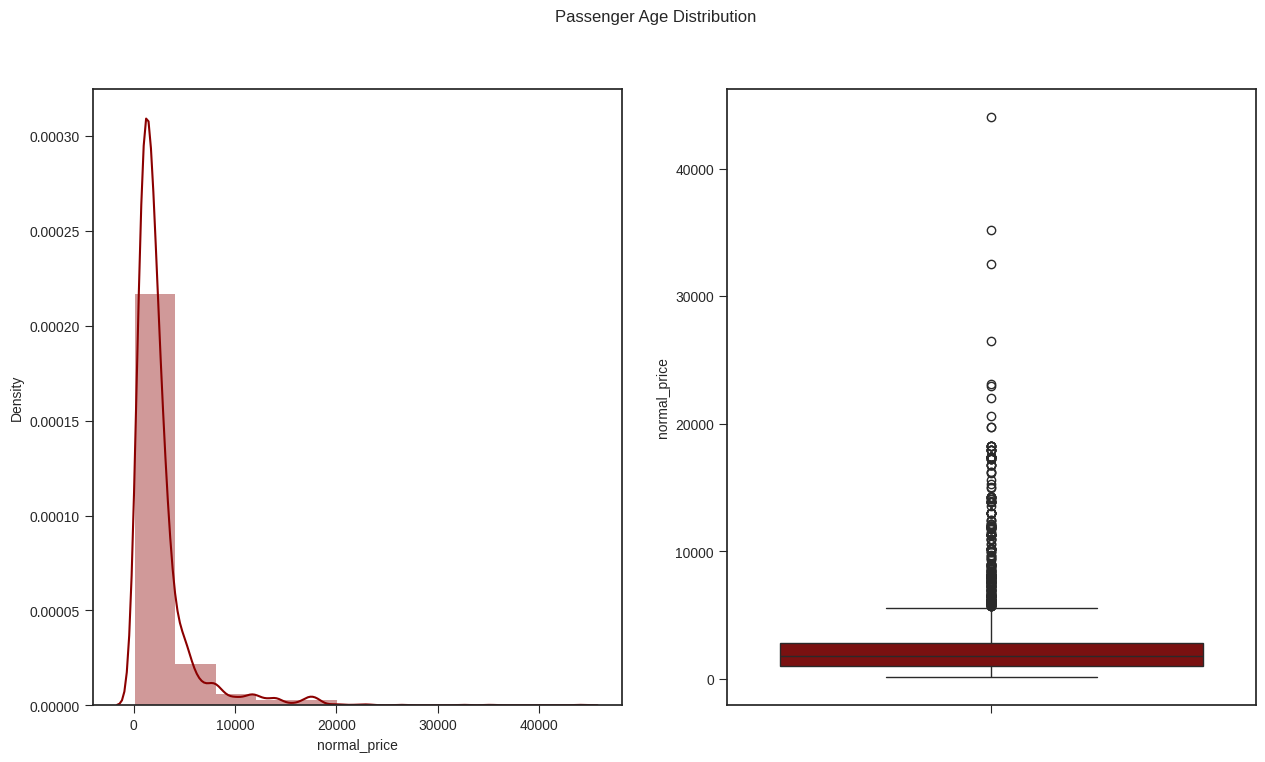

In [42]:
ax=plt.figure(figsize=(15,8))
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
price = result[result['normal_price']>0]['normal_price']
sns.distplot(price,bins=11)
ax.add_subplot(122)
sns.boxplot(price);

Una pregunta interesante es donde esta acumulada la mayor densidad del valor en pesos de todos los productos ?
En la grafica se nos muestra que de 0 a 10 mil pesos chilenos es donde se acumula el mayor valor. Esto implica que la mayoría
de los productos que se encuentran disponibles están en un rango de 10 mil pesos.

### Analisis de Ofertas

In [43]:
oferta_count = result.groupby('oferta')['oferta'].count()
oferta_count

,oferta
oferta,
0,4468


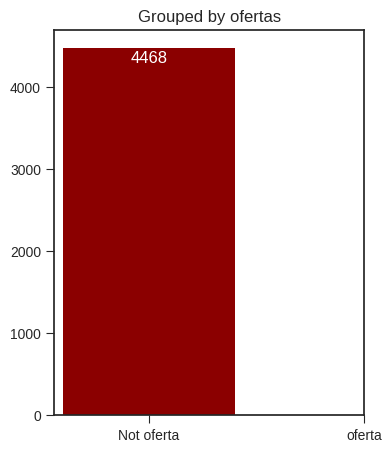

In [44]:
plt.figure(figsize=(4,5))
plt.bar(oferta_count.index, oferta_count.values)
plt.title('Grouped by ofertas')
plt.xticks([0,1],['Not oferta', 'oferta'])
for i, value in enumerate(oferta_count.values):
    plt.text(i, value-120, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

3611 productos no tiene oferta mientas que 857 si tiene ofertas

### Análisis de Stock

In [45]:
no_stock_count = result.groupby('sin_stock')['sin_stock'].count()
no_stock_count

,sin_stock
sin_stock,
1,4468


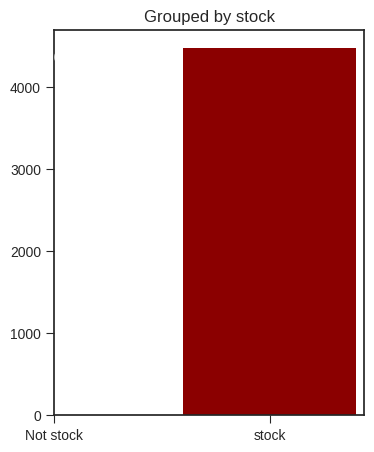

In [46]:
plt.figure(figsize=(4,5))
plt.bar(no_stock_count.index, no_stock_count.values)
plt.title('Grouped by stock')
plt.xticks([0,1],['Not stock', 'stock'])
for i, value in enumerate(oferta_count.values):
    plt.text(i, value-120, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Solo 207 productos no están disponibles en el dataset

### Análisis de Marcas

 - ¿ cuales son las marcas con mayor cantidad de productos ?

In [47]:
no_stock_count = result.groupby('brand')['brand'].count()
no_stock_count.sort_values(ascending=False)[:10]

,brand
brand,
Cuisine & Co,557
Gourmet,204
Soprole,164
Carozzi,153
Colun,148
Maggi,99
Loncoleche,93
Nestlé,89
Lucchetti,88


    - ¿ cuales de esas marcas tienen los precios mas caros y el mayor promedio y cuanto suman su valor en pesos sus productos ?

In [48]:
result.groupby(['brand']).agg({'normal_price':sum}).sort_values(by='normal_price',ascending=False).head(10)


<ipython-input-48-17e910c69bcb>:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,normal_price
brand,
Cuisine & Co,1173175.0
Colun,486303.0
Loncoleche,451933.0
Soprole,347374.0
Gourmet,245559.0
Al Vacío,229995.0
Banquete,164628.0
Carozzi,151432.0
San Francisco De Loncomilla,104018.0


Couisine & Co es el que suma mas valor monetario con un total de un millón ciento setenta y tres mil pesos con ciento setenta y cinco pesos

In [49]:
result.groupby(['brand']).agg({'normal_price':np.mean}).sort_values(by='normal_price',ascending=False).head(10)

<ipython-input-49-655e9d8ed746>:1: FutureWarning:

The provided callable <function mean at 0x787e71357d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,normal_price
brand,
Chivas Regal,32490.0
Jack Daniel'S,26460.0
Estados Unidos,22941.0
Plenitud,16799.0
Americano,15879.5
Bob'S Red Mill,12999.0
Ballantine'S,11490.0
Sombrero Negro,11390.0
Ramazzotti,11290.0


El que tiene un promedio mas elevado es la marca chivas Regal con treinta y dos mil pesos

In [50]:
result.groupby(['brand']).agg({'normal_price':max}).sort_values(by='normal_price',ascending=False).head(10)

<ipython-input-50-fa41561aabd8>:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,normal_price
brand,
Cuisine & Co,44028.0
Al Vacío,35178.0
Chivas Regal,32490.0
Jack Daniel'S,26460.0
Estados Unidos,22941.0
Cusqueña,21990.0
Loncoleche,19788.0
Soprole,18228.0
Colun,17388.0


Coisine & Co es la marca que tiene el producto mas caro

### Distribución de los precios por categorías

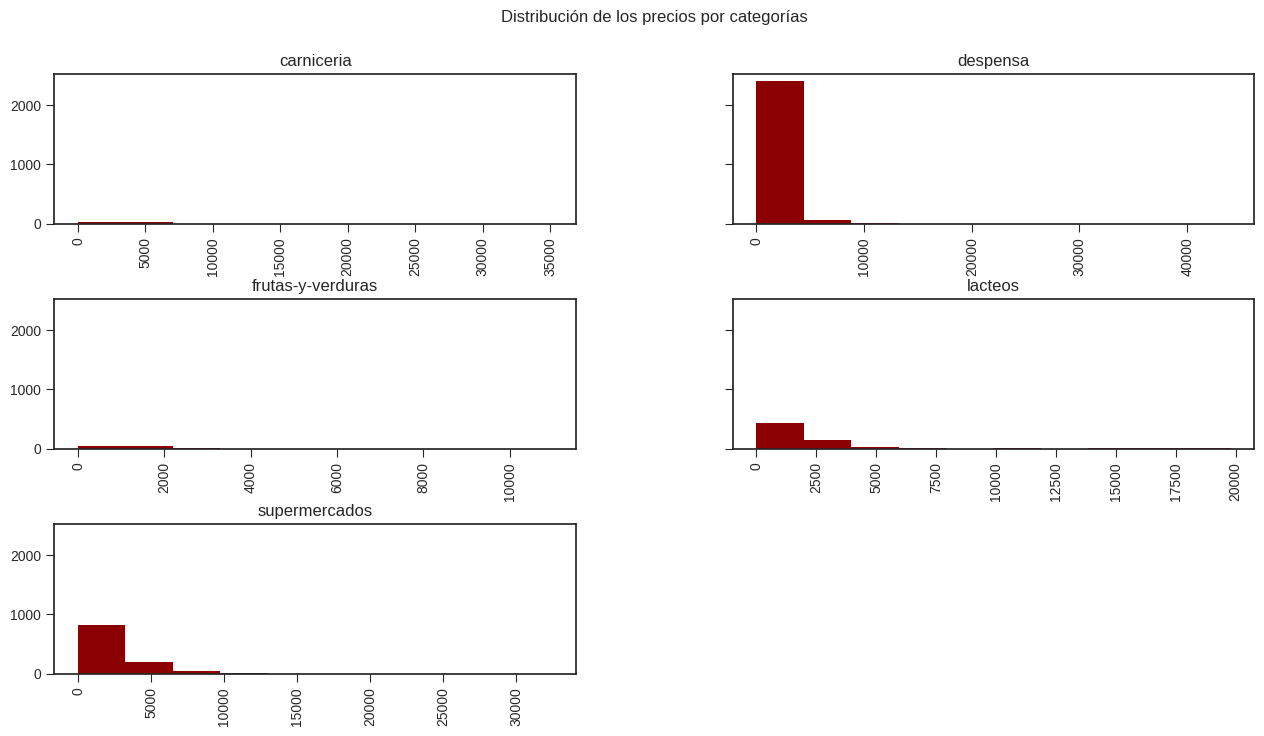

In [51]:
result.hist(column="normal_price",by="categoria1",sharey=True,figsize=(15,8))
plt.suptitle('Distribución de los precios por categorías');

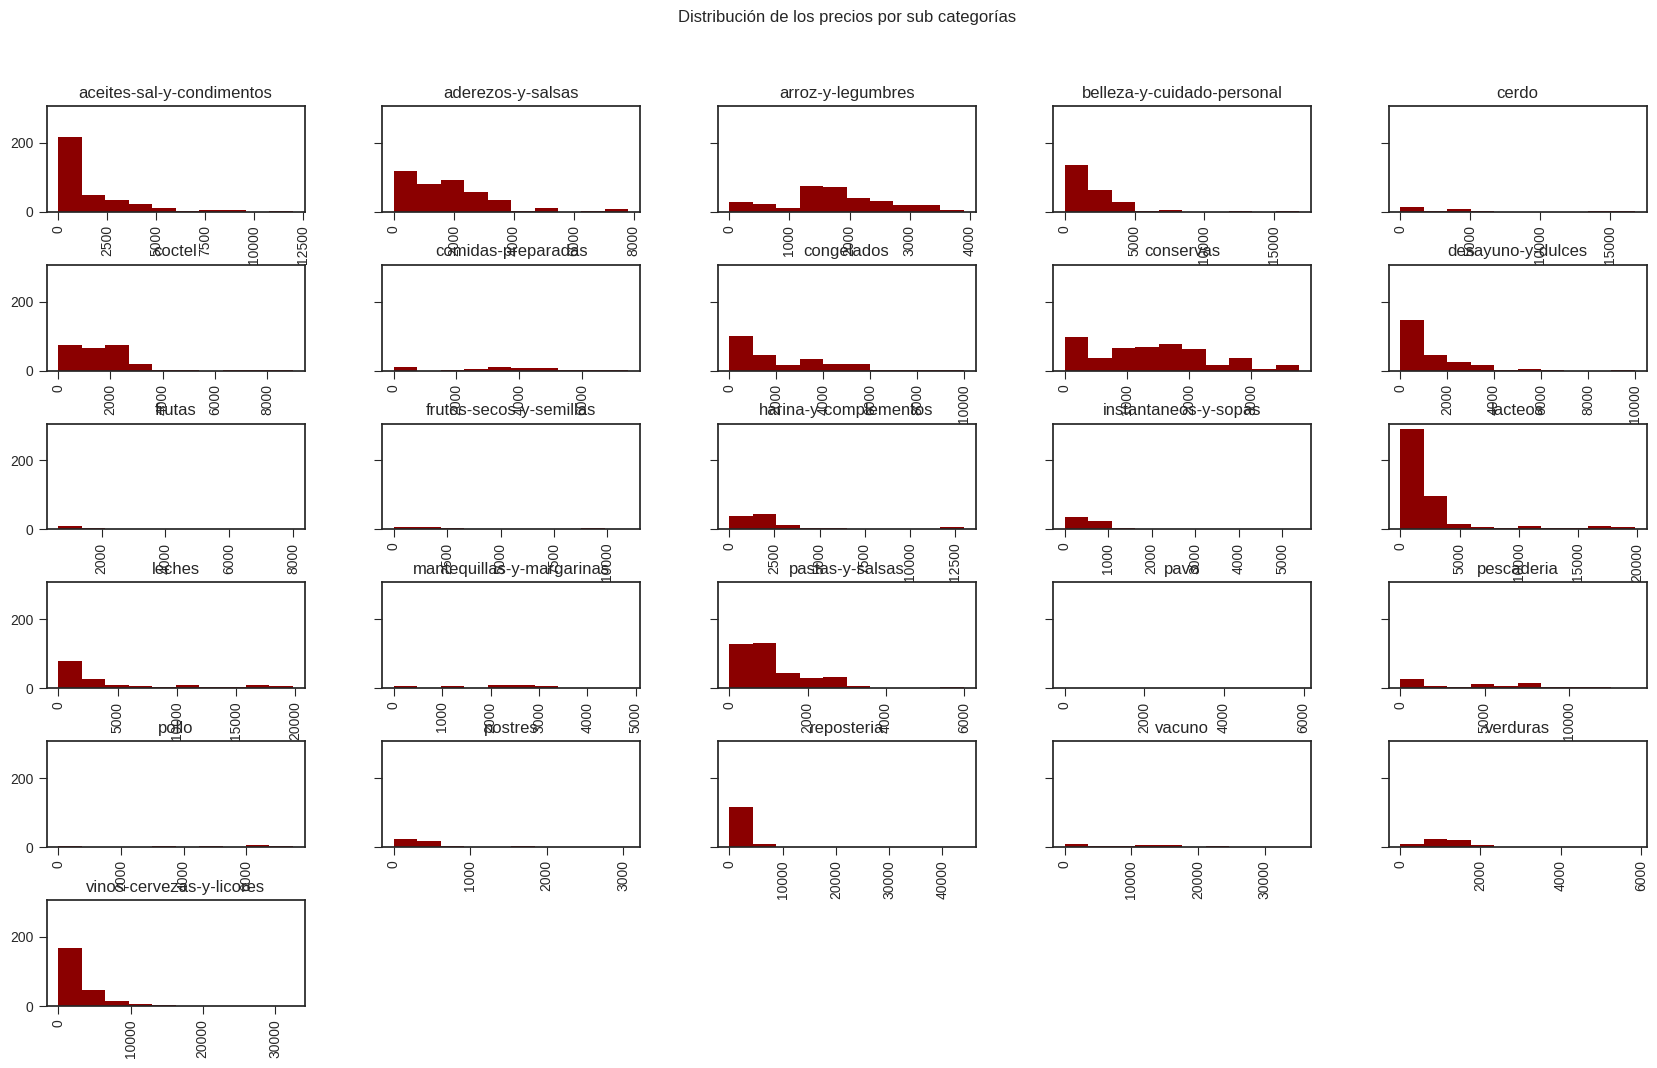

In [52]:
result.hist(column="normal_price",by="categoria2",sharey=True,figsize=(20,12))
plt.suptitle('Distribución de los precios por sub categorías');

## Palabras mas Comunes en los productos

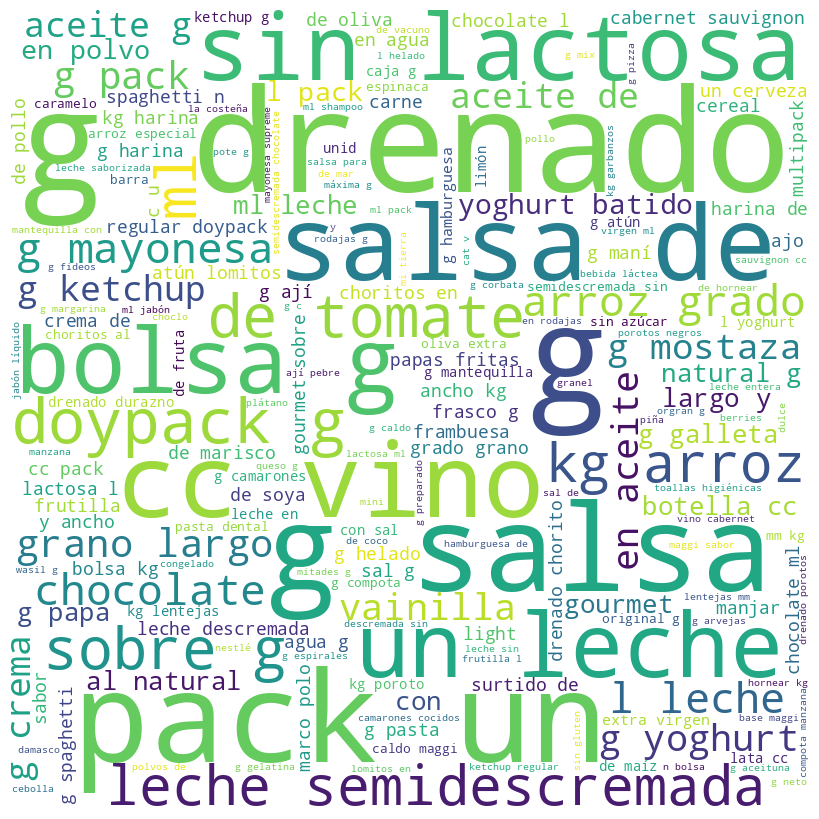

In [53]:
comment_words = ''
stopwords = set(STOPWORDS)


# iterate through the csv file
for val in result['title']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [54]:
#result['title'].value_counts(dropna=False).head(15)

## Respuesta a las Preguntas iniciales
-  ¿ cual es la distribución de precios de todos los productos ?
    - R) los precios siguen una distribución normal sesgada a la derecha. lo cual muestra que la mayor densidad de los precios Se encuentra entre 0 a 5.000 pesos
-  ¿ cual es la cantidad de productos con ofertas con respecto a los que no lo tienen ?
    - R) hay un total de 857 productos con ofertas
-  ¿ cual es el producto mas caro ?
    - R) crema de leche de 1 litro con un precio de cuarenta y cuatro mil pesos
-  ¿ cual es la distribución del precio de los productos con respecto a su categoría y su sub categoría?
    - R) Ver grafico
-  ¿ cual es la marca mas frecuente en santaisabel. Que posee mayor cantidad de productos ?
    - R) Soprole y Colun son las marcas mas frecuentes
-  ¿ cuales son los productos que tienen un mayor descuento y cuales son sus porcentaje ?
    - R) Pack 24 un. Cerveza lager 5.2° 330 cc con un descuento del 14% y un ahorro de 9500.0 pesos
    el segundo producto es 'Caja 24 un. cerveza lager botella 330 cc c/u' con un descuento del 14% y un ahorro de 9280.0 pesos
-  ¿ cuales son las palabras mas frecuentes de los productos ?
    - R) Ver grafico de arriba

In [55]:
#guardar el dataset
result.to_csv('result.csv',index=False,encoding='utf-8', header='true')